In [34]:
import tensorflow as tf
import os
import sys
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pickle
from dataShaping import *
from savePerf import *
import scipy.io.wavfile
import time
from tensorflow.python.tools import freeze_graph
from tensorflow.keras import layers
import tensorflow.keras as kr
from keras.callbacks import EarlyStopping, ModelCheckpoint
import IPython

json_file = open('trainSintetic', 'r') #Choose model to emulate
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.compat.v1.keras.models.model_from_json(loaded_model_json)
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                4352      
_________________________________________________________________
dense (Dense)                (None, 250)               8250      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 12,853
Trainable params: 12,853
Non-trainable params: 0
_________________________________________________________________


In [30]:
num_step=loaded_model.layers[0].input.shape[1]

In [31]:
fileNameValidation = 'valSintetic.mat' # dataset validation path
validation = sio.loadmat(fileNameValidation)['val']
valInput,valOutput = shapeData(validation,num_step,-1,1)
prediction = loaded_model.predict(valInput)

In [8]:
IPython.display.Audio(np.transpose(prediction), rate=44100)

In [9]:
IPython.display.Audio(np.transpose(validation)[0], rate=44100)

In [10]:
IPython.display.Audio(np.transpose(validation)[1], rate=44100)

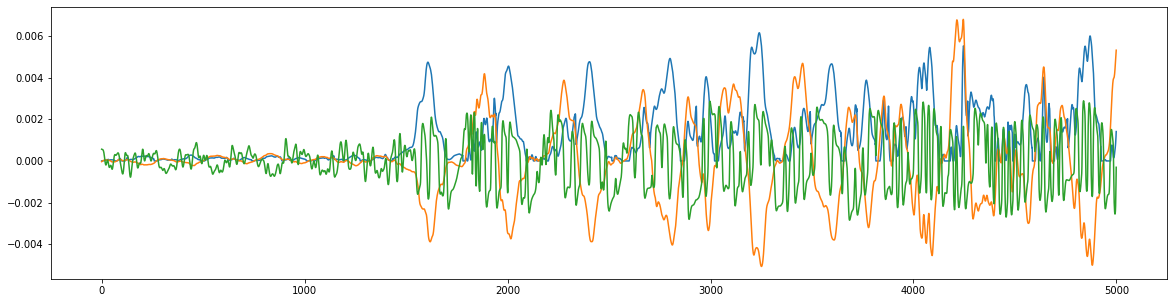

In [44]:
%matplotlib inline 
plt.rcParams['figure.figsize'] =[20,5]

plt.plot(normalize(np.transpose(prediction))[0,5000:10000])
plt.plot(normalize(np.transpose(validation))[0,5000:10000])
plt.plot(normalize(np.transpose(validation))[1,5000:10000])